# Provision

In [1]:
from blocksnet import City, Provision, ProvisionMethod

city = City.from_pickle('../data/model.pickle')

In [6]:
provision = Provision(city_model=city)
service_type = city['school']
result = provision.calculate(service_type, method=ProvisionMethod.GRAVITATIONAL)

2024-09-14 05:01:19.282 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 15 : 4591x565
2024-09-14 05:01:38.066 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:01:42.405 | INFO     | blocksnet.method.provision:_lp_provision:350 - Restoring values from variables
2024-09-14 05:01:44.908 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 30 : 1822x16
2024-09-14 05:01:45.129 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:01:45.181 | INFO     | blocksnet.method.provision:_lp_provision:350 - Restoring values from variables
2024-09-14 05:01:45.255 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 60 : 1667x3
2024-09-14 05:01:45.317 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:01:45.340 | INFO     | bl

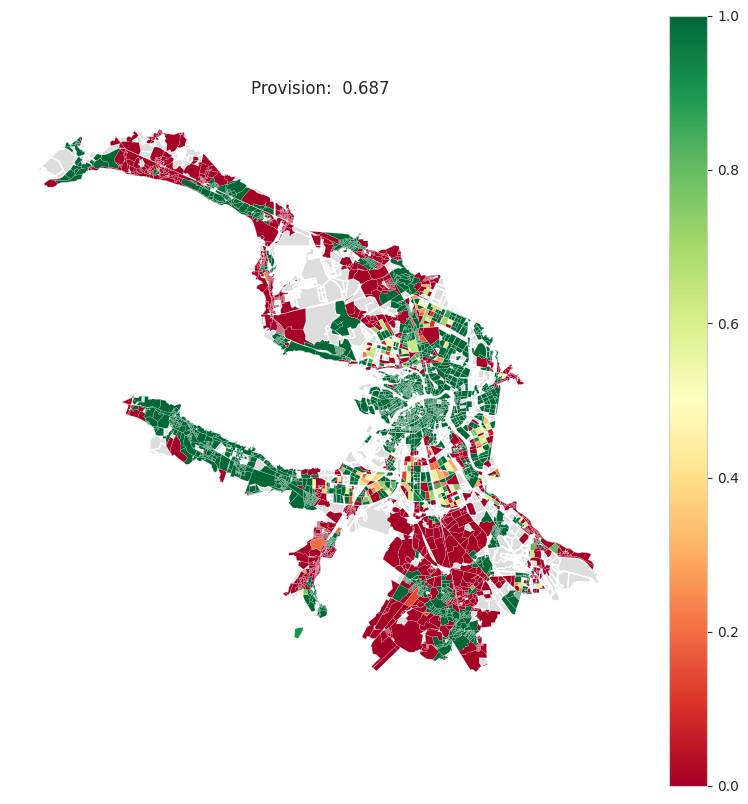

In [7]:
provision.plot(result, figsize=(10,10))

## Update scenario

In [8]:
import pandas as pd

update = {
  3506: {
    'population': 100000
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')
update_df

,population
3506,100000


In [9]:
upd_result = provision.calculate(service_type, update_df)

2024-09-14 05:01:59.244 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 15 : 4591x565
2024-09-14 05:02:17.606 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:02:22.232 | INFO     | blocksnet.method.provision:_lp_provision:350 - Restoring values from variables
2024-09-14 05:02:24.800 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 30 : 1840x9
2024-09-14 05:02:24.924 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:02:24.956 | INFO     | blocksnet.method.provision:_lp_provision:350 - Restoring values from variables
2024-09-14 05:02:25.019 | INFO     | blocksnet.method.provision:_lp_provision:312 - Setting an LP problem for accessibility = 60 : 1713x3
2024-09-14 05:02:25.075 | INFO     | blocksnet.method.provision:_lp_provision:346 - Solving the problem
2024-09-14 05:02:25.097 | INFO     | blo

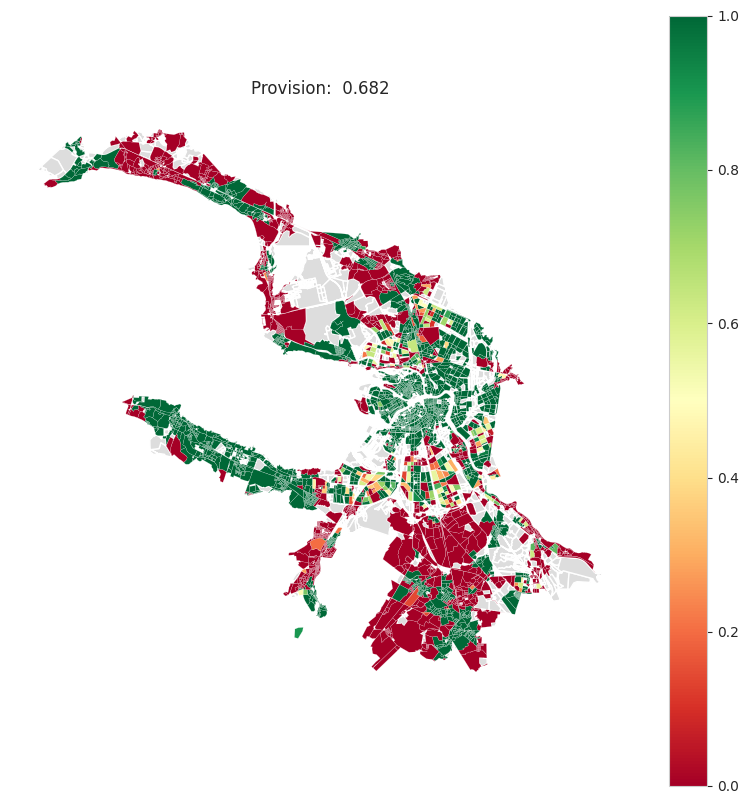

In [10]:
provision.plot(upd_result, figsize=(10,10))

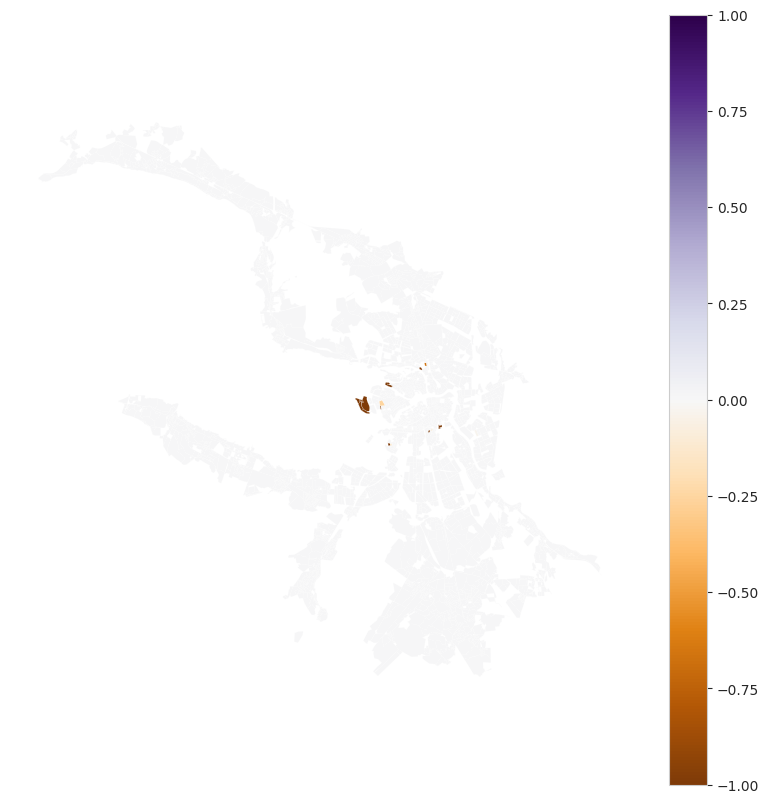

In [11]:
delta_result = upd_result.copy()
delta_result['provision'] -= result['provision']
delta_result.plot(
  column='provision', 
  vmin=-1, 
  vmax=1, 
  legend=True, 
  linewidth=0.1, 
  figsize=(10,10),
  cmap="PuOr"
).set_axis_off()

## Some utilities

Statistics to help user understand the results

In [9]:
provision.stat(result)

{'mean': 0.6228538098164098, 'median': 1.0, 'min': 0.0, 'max': 1.0}

Overall provision assessment

In [10]:
provision.total(result)

0.686326031371392

Lower and upper bounds of possible provision assessment based on blocks capacities and demands

In [11]:
provision.get_bounds(service_type)

(0.3889247430791169, 0.6996023258100998)